In [15]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [16]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'C'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [17]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,65.599998,64.220001,65.260002,64.300003,17494000.0,62.547298
2019-03-21,64.309998,62.919998,63.669998,63.910000,18638300.0,62.167927
2019-03-22,63.230000,60.450001,62.980000,60.980000,27527400.0,59.317787
2019-03-25,61.660000,60.049999,60.980000,60.330002,20899300.0,58.685509
2019-03-26,61.349998,60.529999,60.990002,61.220001,14740300.0,59.551254


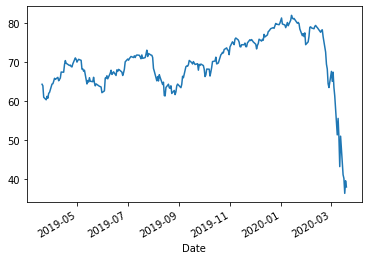

In [18]:
%matplotlib inline
data.Close.plot()

In [19]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [20]:
df = BBANDS(data,20)

In [21]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

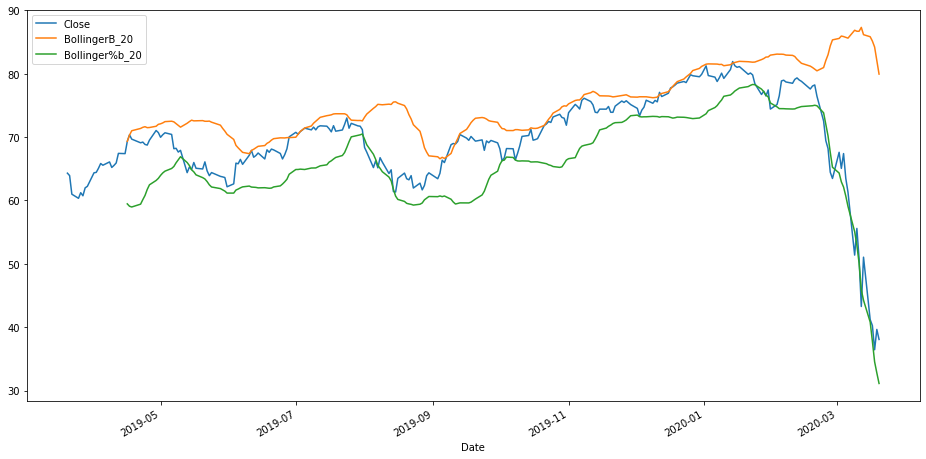

In [22]:
df2.plot(figsize = (16,8))

In [23]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,64.300003,Sin informacion,-
2019-03-21,63.910000,Sin informacion,-
2019-03-22,60.980000,Sin informacion,-
2019-03-25,60.330002,Sin informacion,-
2019-03-26,61.220001,Sin informacion,-
2019-03-27,60.730000,Sin informacion,-
2019-03-28,61.980000,Sin informacion,-
2019-03-29,62.220001,Sin informacion,-
2019-04-01,64.360001,Sin informacion,-
